In [1]:
import numpy as np

In [48]:
n_nodes = 4
nodes = list(range(n_nodes))
M = np.random.rand(n_nodes, n_nodes)

In [49]:
def make_edges(M):
    edges = []
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            edges.append((i, j, M[i, j]))
    return edges

In [50]:
def make_graph(G, nodes, M):
    G.add_nodes_from(nodes)
    G.add_edges_from(make_edges(M))

    return G

In [52]:
edges = make_edges(M)
G = nx.MultiDiGraph()
G = make_graph(G, nodes, M)


In [26]:
G.number_of_edges()

16

In [39]:
hist, bin_edges = np.histogram(M.flatten(), bins=5)
print(hist)
print(bin_edges)

[2 2 3 5 4]
[0.04398038 0.22891057 0.41384077 0.59877096 0.78370115 0.96863134]


In [54]:
nx.get_edge_attributes(G,'weight').items()

dict_items([])

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

seed = 13648  # Seed random number generators for reproducibility
pos = nx.spring_layout(G, seed=seed)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.plasma)

ax = plt.gca()
ax.set_axis_off()
plt.show()

ValueError: not enough values to unpack (expected 2, got 0)

In [46]:
make_edges(M)

[(0, 0, 0.1799368922511826),
 (0, 1, 0.9554606581571167),
 (0, 2, 0.9297116834059783),
 (0, 3, 0.7694838873684321),
 (1, 0, 0.6860663211503091),
 (1, 1, 0.6747779322829854),
 (1, 2, 0.8336491393478077),
 (1, 3, 0.04398038178027408),
 (2, 0, 0.5274796736830434),
 (2, 1, 0.2501232287006241),
 (2, 2, 0.6889332552844285),
 (2, 3, 0.7733676055131793),
 (3, 0, 0.573561568037269),
 (3, 1, 0.29636532614855804),
 (3, 2, 0.45241875374700646),
 (3, 3, 0.9686313438536825)]

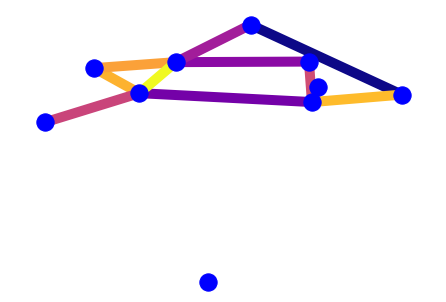

In [56]:
# Src: https://stackoverflow.com/questions/22967086/colouring-edges-by-weight-in-networkx

import matplotlib.pyplot as plt
import networkx as nx
import random

G = nx.gnp_random_graph(10,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.plasma)